<center>
<img src="https://laelgelcpublic.s3.sa-east-1.amazonaws.com/lael_50_years_narrow_white.png.no_years.400px_96dpi.png" width="300" alt="LAEL 50 years logo">
<h3>APPLIED LINGUISTICS GRADUATE PROGRAMME (LAEL)</h3>
</center>
<hr>

# Corpus Linguistics - Study 1 - Phase 4 - eyamrog

The aim of this phase is to PDF scrape the selected texts from the archive of preprints of [SciELO](https://scielo.org/) (Scientific Electronic Library Online), isolate the paragraphs of the articles and review them with ChatGPT.

- [SciELO Preprints](https://preprints.scielo.org/index.php/scielo)

## Required Python packages

- beautifulsoup4
- PyMuPDF
- lxml
- pandas
- requests

## Importing the required libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import fitz # PyMuPDF
import re
import pandas as pd
import os
import sys
import logging
from tqdm import tqdm
import matplotlib.pyplot as plt

## Defining input variables

In [2]:
input_directory = 'cl_st1_ph3_eyamrog'
output_directory = 'cl_st1_ph4_eyamrog'

## Creating output directory

In [3]:
# Check if the output directory already exists. If it does, do nothing. If it doesn't exist, create it.
if os.path.exists(output_directory):
    print('Output directory already exists.')
else:
    try:
        os.makedirs(output_directory)
        print('Output directory successfully created.')
    except OSError as e:
        print('Failed to create the directory:', e)
        sys.exit(1)

Output directory successfully created.


## PDF Scraping `SciELO Preprints` archive

### Importing the data into a DataFrame

In [4]:
df_scielo_preprint_preChatGPT_en = pd.read_json(f'{input_directory}/scielo_erpp_pp.jsonl', lines=True)

In [5]:
df_scielo_preprint_preChatGPT_en.dtypes

Title           object
URL             object
Authors         object
Published       object
PDF Language    object
PDF URL         object
Submitted        int64
Posted           int64
Text            object
Text ID         object
dtype: object

In [6]:
df_scielo_preprint_preChatGPT_en['Submitted'] = pd.to_datetime(df_scielo_preprint_preChatGPT_en['Submitted'], unit='ms')
df_scielo_preprint_preChatGPT_en['Posted'] = pd.to_datetime(df_scielo_preprint_preChatGPT_en['Posted'], unit='ms')

In [7]:
df_scielo_preprint_preChatGPT_en

,Title,URL,Authors,Published,PDF Language,PDF URL,Submitted,Posted,Text,Text ID
0,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,Publication status: Preprint has been publishe...,t000000
1,Assembling the perfect bacterial genome using ...,https://preprints.scielo.org/index.php/scielo/...,"Ryan R. Wick, Louise M. Judd, Kathryn E. Holt",Submitted 11/11/2022 - Posted 11/11/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-11,2022-11-11,Publication status: Preprint has been publishe...,t000001
2,ON METHODOLOGY AND METHODS FOR ANALYSING CLASS...,https://preprints.scielo.org/index.php/scielo/...,Leonardo Goncalves Lago,Submitted 11/10/2022 - Posted 11/16/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-10,2022-11-16,Publication status: Preprint has been publishe...,t000002
3,"MOBILIZING LINGUISTIC AND SEMIOTIC RESOURCES, ...",https://preprints.scielo.org/index.php/scielo/...,"Estêvão Cabral, Marylin Martin-Jones",Submitted 11/07/2022 - Posted 11/07/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-07,2022-11-07,Publication status: Preprint has been submitte...,t000003
4,PORTUGUESE AO PÉ DO BERIMBAU: ON CAPOEIRA AS A...,https://preprints.scielo.org/index.php/scielo/...,"Mike Baynham, Jolana Hanusova",Submitted 11/04/2022 - Posted 11/04/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-04,2022-11-04,Publication status: Preprint has been submitte...,t000004
...,...,...,...,...,...,...,...,...,...,...
311,Challenges in the fight against the COVID-19 p...,https://preprints.scielo.org/index.php/scielo/...,Eduardo Alexandrino Servolo Medeiros,Submitted 04/15/2020 - Posted 04/15/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-15,2020-04-15,*Corresponding author. E-mail: edubalaccih@gma...,t000311
312,Information about the new coronavirus disease ...,https://preprints.scielo.org/index.php/scielo/...,Claudio Márcio Amaral de Oliveira Lima,Submitted 04/13/2020 - Posted 04/13/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-13,2020-04-13,V\nRadiol Bras. 2020 Mar/Abr;53(2):V–VI\n0100-...,t000312
313,ACE2 diversity in placental mammals reveals th...,https://preprints.scielo.org/index.php/scielo/...,"Bibiana Sampaio de Oliveira Fam, Pedro Vargas-...",Submitted 04/11/2020 - Posted 04/28/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-11,2020-04-28,Status: Preprint has been published in a journ...,t000313
314,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,Publication status: Preprint has been publishe...,t000314


### Adding the column `Area of Knowledge`

### Capturing a document page for inspection

In [8]:
url = df_scielo_preprint_preChatGPT_en.at[2, 'URL']

In [9]:
url

'https://preprints.scielo.org/index.php/scielo/preprint/view/5052'

In [10]:
document_page = requests.get(url, verify=False)

/home/eyamrog/my_env/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'preprints.scielo.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [11]:
with open(f'{output_directory}/area_of_knowledge.html', 'wb') as file:
    file.write(document_page.content)

Using the document `area_of_knowledge.html`, the capturing of the area of knowledge can be planned.

In [12]:
soup = BeautifulSoup(document_page.content, 'lxml')
item_section = soup.find('div', class_='item section')
section_value = item_section.find('div', class_='value')
section_value_text = section_value.get_text(strip=True)
section_value_text

'Applied Social Sciences'

### Adding the column `Area of Knowledge`

In [ ]:
# Setting up logging
logging.basicConfig(
    filename = f"{output_directory}/area_of_knowledge_log.txt",
    level = logging.INFO,
    format = '%(asctime)s - %(levelname)s - %(message)s'
)

def fetch_area_of_knowledge(url):
    try:
        document_page = requests.get(url, verify=False)
        document_page.raise_for_status()  # Raise an HTTPError for bad responses
        soup = BeautifulSoup(document_page.content, 'lxml')
        item_section = soup.find('div', class_='item section')
        if item_section:
            section_value = item_section.find('div', class_='value')
            if section_value:
                return section_value.get_text(strip=True)
        logging.info(f"Area of Knowledge successfully extracted from {url}")
        return None
    except requests.RequestException as e:
        logging.error(f"Request failed for URL {url}: {e}")
        return None
    except Exception as e:
        logging.error(f"An error occurred while processing URL {url}: {e}")
        return None

# Initialising a list to store the areas of knowledge coptured
area_of_knowledge = []

# Using 'tqdm' for progress checking
for index, row in tqdm(df_scielo_preprint_preChatGPT_en.iterrows(), total=df_scielo_preprint_preChatGPT_en.shape[0], desc='Getting Area of Knowledge'):
    section_text = fetch_area_of_knowledge(row['URL'])
    area_of_knowledge.append(section_text)

# Add the 'Area of Knowledge' column to the DataFrame
df_scielo_preprint_preChatGPT_en['Area of Knowledge'] = area_of_knowledge

logging.info("Completed processing all URLs.")

In [14]:
df_scielo_preprint_preChatGPT_en

,Title,URL,Authors,Published,PDF Language,PDF URL,Submitted,Posted,Text,Text ID,Area of Knowledge
0,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,Publication status: Preprint has been publishe...,t000000,Biological Sciences
1,Assembling the perfect bacterial genome using ...,https://preprints.scielo.org/index.php/scielo/...,"Ryan R. Wick, Louise M. Judd, Kathryn E. Holt",Submitted 11/11/2022 - Posted 11/11/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-11,2022-11-11,Publication status: Preprint has been publishe...,t000001,Biological Sciences
2,ON METHODOLOGY AND METHODS FOR ANALYSING CLASS...,https://preprints.scielo.org/index.php/scielo/...,Leonardo Goncalves Lago,Submitted 11/10/2022 - Posted 11/16/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-10,2022-11-16,Publication status: Preprint has been publishe...,t000002,Applied Social Sciences
3,"MOBILIZING LINGUISTIC AND SEMIOTIC RESOURCES, ...",https://preprints.scielo.org/index.php/scielo/...,"Estêvão Cabral, Marylin Martin-Jones",Submitted 11/07/2022 - Posted 11/07/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-07,2022-11-07,Publication status: Preprint has been submitte...,t000003,"Linguistic, literature and arts"
4,PORTUGUESE AO PÉ DO BERIMBAU: ON CAPOEIRA AS A...,https://preprints.scielo.org/index.php/scielo/...,"Mike Baynham, Jolana Hanusova",Submitted 11/04/2022 - Posted 11/04/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-04,2022-11-04,Publication status: Preprint has been submitte...,t000004,"Linguistic, literature and arts"
...,...,...,...,...,...,...,...,...,...,...,...
311,Challenges in the fight against the COVID-19 p...,https://preprints.scielo.org/index.php/scielo/...,Eduardo Alexandrino Servolo Medeiros,Submitted 04/15/2020 - Posted 04/15/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-15,2020-04-15,*Corresponding author. E-mail: edubalaccih@gma...,t000311,Health Sciences
312,Information about the new coronavirus disease ...,https://preprints.scielo.org/index.php/scielo/...,Claudio Márcio Amaral de Oliveira Lima,Submitted 04/13/2020 - Posted 04/13/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-13,2020-04-13,V\nRadiol Bras. 2020 Mar/Abr;53(2):V–VI\n0100-...,t000312,Health Sciences
313,ACE2 diversity in placental mammals reveals th...,https://preprints.scielo.org/index.php/scielo/...,"Bibiana Sampaio de Oliveira Fam, Pedro Vargas-...",Submitted 04/11/2020 - Posted 04/28/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-11,2020-04-28,Status: Preprint has been published in a journ...,t000313,Biological Sciences
314,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,Publication status: Preprint has been publishe...,t000314,Biological Sciences


### Inspecting the column `Area of Knowledge`

#### Getting a list of areas of knowledge

In [15]:
area_of_knowledge_values = df_scielo_preprint_preChatGPT_en['Area of Knowledge'].unique()
area_of_knowledge_list = area_of_knowledge_values.tolist()
area_of_knowledge_set = set(area_of_knowledge_values)

In [16]:
area_of_knowledge_list.sort()

In [17]:
area_of_knowledge_list

['Agricultural Sciences',
 'Applied Social Sciences',
 'Biological Sciences',
 'Engineering',
 'Exact and Earth Sciences',
 'Health Sciences',
 'Human Sciences',
 'Linguistic, literature and arts']

#### Quantifying the articles according to their area of knowledge

In [18]:
# Getting the counts of each unique value in the 'Area of Knowledge' column
counts = df_scielo_preprint_preChatGPT_en['Area of Knowledge'].value_counts()

# Converting the Series to a DataFrame
df_counts = counts.reset_index()

# Renaming the columns
df_counts.columns = ['Area of Knowledge', 'Area of Knowledge Counts']
df_counts

,Area of Knowledge,Area of Knowledge Counts
0,Health Sciences,186
1,Biological Sciences,50
2,Human Sciences,27
3,Applied Social Sciences,24
4,"Linguistic, literature and arts",15
5,Engineering,6
6,Exact and Earth Sciences,5
7,Agricultural Sciences,3


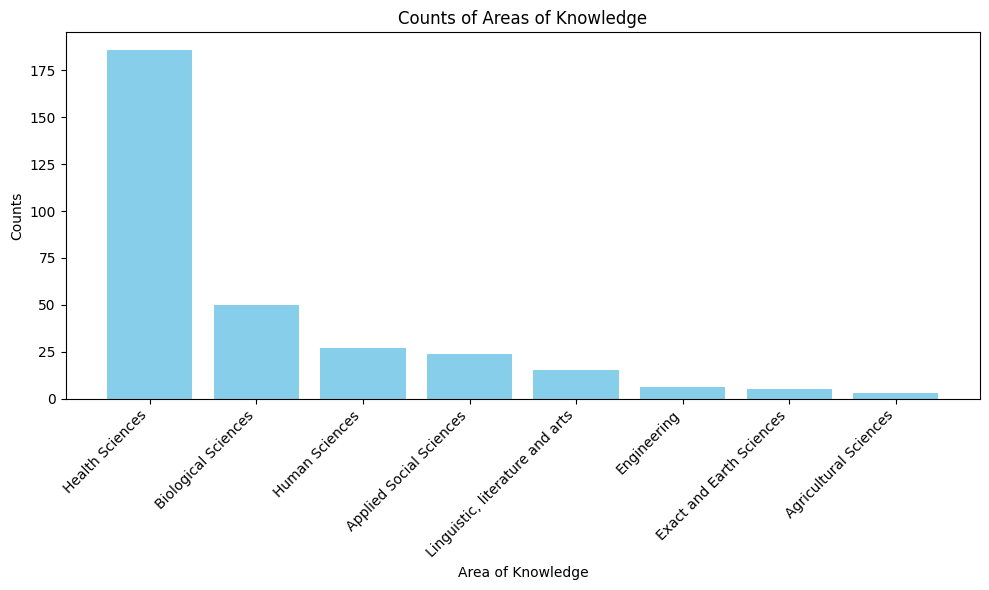

In [19]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_counts['Area of Knowledge'], df_counts['Area of Knowledge Counts'], color='skyblue')
plt.xlabel('Area of Knowledge')
plt.ylabel('Counts')
plt.title('Counts of Areas of Knowledge')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Extracting the articles in original PDF format and scraping them into TXT format

Note: If logging was previously configured, those definitions are not redefined by a new configuration. Log messages are appended to the previously defined log file.

In [ ]:
# Configure logging to write to a file
logging.basicConfig(
    filename = f"{output_directory}/pdf_scraping_log.txt",
    level = logging.INFO,
    format = '%(asctime)s - %(levelname)s - %(message)s'
)

def scrape_pdf(pdf_byte_stream, output_txt):
    try:
        # Opening the PDF file
        doc = fitz.open(stream=pdf_byte_stream, filetype='pdf')
        
        # Initialising an empty string to store the text
        text = ''
        
        # Iterating through all the pages and extracting the text
        for page in doc:
            text += page.get_text()
        
        # Writing the extracted text to a text file in UTF-8 encoding
        with open(output_txt, 'w', encoding='utf-8') as txt_file:
            txt_file.write(text)
        
        logging.info(f"Text successfully extracted and saved to {output_txt}")
    except Exception as e:
        logging.error(f"Error extracting text from PDF: {e}")

def save_pdf(pdf_byte_stream, output_pdf):
    try:
        with open(output_pdf, 'wb') as pdf_file:
            pdf_file.write(pdf_byte_stream)
        
        logging.info(f"PDF successfully saved to {output_pdf}")
    except Exception as e:
        logging.error(f"Error saving PDF: {e}")

for index, row in df_scielo_preprint_preChatGPT_en.iterrows():
    try:
        article_page = requests.get(row['PDF URL'], verify=False)
        soup = BeautifulSoup(article_page.content, 'lxml')
        # Finding the <a> tag with the class 'download'
        download_link = soup.find('a', class_='download')
        article_pdf_link = download_link.get('href') if download_link else 'No PDF link'
        
        if article_pdf_link != 'No PDF link':
            article = requests.get(article_pdf_link, verify=False)
            # Scraping the article from the byte stream and saving it in the output directory
            scrape_pdf(article.content, f"{output_directory}/{row['Text ID']}_raw.txt")
            # Saving the article in the output directory
            save_pdf(article.content, f"{output_directory}/{row['Text ID']}.pdf")
        else:
            logging.warning(f"No PDF link found for Text ID {row['Text ID']}")
    except Exception as e:
        logging.error(f"Error processing row {index}: {e}")

### Exporting to a file

In [21]:
df_scielo_preprint_preChatGPT_en.to_json(f"{output_directory}/scielo_erpp_pp.jsonl", orient='records', lines=True)

## Tokenising the paragraphs of each article

### Importing the data into a DataFrame

In [ ]:
df_scielo_preprint_preChatGPT_en = pd.read_json(f'{output_directory}/scielo_erpp_pp.jsonl', lines=True)

In [ ]:
df_scielo_preprint_preChatGPT_en.dtypes

In [ ]:
df_scielo_preprint_preChatGPT_en['Submitted'] = pd.to_datetime(df_scielo_preprint_preChatGPT_en['Submitted'], unit='ms')
df_scielo_preprint_preChatGPT_en['Posted'] = pd.to_datetime(df_scielo_preprint_preChatGPT_en['Posted'], unit='ms')

In [ ]:
df_scielo_preprint_preChatGPT_en

### Manual inspection and clean up

Inspect each article in `TXT` format and:
- Remove titles and subtitles
- Remove headers and footers
- Remove elements such as tables, figures, references and appendices
- Separate sets of lines that constitute paragraphs with an empty line

### Merging lines into paragraphs

In [22]:
# Setting up logging
logging.basicConfig(
    filename = f"{output_directory}/paragraph_tokenise_log.txt",
    level = logging.INFO,
    format = '%(asctime)s - %(levelname)s - %(message)s'
)

# Defining a function to tokenise the paragraphs of each article
def paragraph_tokenise(text):
    lines = text.split('\n')
    paragraphs = []
    paragraph = ''
    
    for line in lines:
        if line.strip():
            cleaned_line = ' '.join(line.split())  # Remove extra spaces within the line
            paragraph += ' ' + cleaned_line.strip()  # Join subsequent lines into a paragraph
        else:
            paragraphs.append(paragraph.strip())  # If there is an empty line, the paragraph consolidated so far is added to the list of paragraphs
            paragraph = ''  # The paragraph variable is cleared out
    
    if paragraph:
        paragraphs.append(paragraph.strip())  # The last paragraph is added to the list of paragraphs
    
    tokenised_paragraphs = '\n'.join(paragraphs)  # The list of paragraphs is compiled into a text with each paragraph as a separate line
    
    return tokenised_paragraphs

# Defining a function to read the content of a TXT file
def read_txt_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    except Exception as e:
        logging.error(f"Error reading file {file_path}: {e}")
        return None

# Defining a function to save the paragraph-tokenised articles into TXT files
def save_paragraph_tokenised_file(output_text_content, output_file):
    try:
        with open(output_file, 'w', encoding='utf-8') as output_txt_file:
            output_txt_file.write(output_text_content)
        logging.info(f"Successfully saved tokenised file: {output_file}")
    except Exception as e:
        logging.error(f"Error saving file {output_file}: {e}")

# Iterating through each row in the DataFrame and add the text content
for index, row in tqdm(df_scielo_preprint_preChatGPT_en.iterrows(), total=df_scielo_preprint_preChatGPT_en.shape[0], desc='Processing files'):
    text_id = row['Text ID']
    txt_file_path = os.path.join(output_directory, f"{text_id}.txt")
    if os.path.exists(txt_file_path):
        text_content = read_txt_file(txt_file_path)
        if text_content:
            paragraph_tokenised_text_content = paragraph_tokenise(text_content)
            save_paragraph_tokenised_file(paragraph_tokenised_text_content, f"{output_directory}/{text_id}_tokenised.txt")
    else:
        logging.warning(f"File not found: {txt_file_path}")

Processing files: 100%|██████████| 316/316 [00:00<00:00, 1379.14it/s]


## Adding the column `Text Paragraphs` with the text extracted from each article

In [23]:
# Function to read the content of a TXT file
def read_txt_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Iterating through each row in the DataFrame and add the text content
texts = []
for index, row in df_scielo_preprint_preChatGPT_en.iterrows():
    text_id = row['Text ID']
    txt_file_path = os.path.join(output_directory, f"{text_id}_tokenised.txt")
    if os.path.exists(txt_file_path):
        text_content = read_txt_file(txt_file_path)
    else:
        text_content = None  # or you can set it to an empty string or any default value
    texts.append(text_content)

# Add the 'Text Paragraphs' column to the DataFrame
df_scielo_preprint_preChatGPT_en['Text Paragraphs'] = texts

In [24]:
df_scielo_preprint_preChatGPT_en

,Title,URL,Authors,Published,PDF Language,PDF URL,Submitted,Posted,Text,Text ID,Area of Knowledge,Text Paragraphs
0,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,Publication status: Preprint has been publishe...,t000000,Biological Sciences,"(Fern flora of Viçosa, Minas Gerais State, Bra..."
1,Assembling the perfect bacterial genome using ...,https://preprints.scielo.org/index.php/scielo/...,"Ryan R. Wick, Louise M. Judd, Kathryn E. Holt",Submitted 11/11/2022 - Posted 11/11/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-11,2022-11-11,Publication status: Preprint has been publishe...,t000001,Biological Sciences,A perfect bacterial genome assembly is one whe...
2,ON METHODOLOGY AND METHODS FOR ANALYSING CLASS...,https://preprints.scielo.org/index.php/scielo/...,Leonardo Goncalves Lago,Submitted 11/10/2022 - Posted 11/16/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-10,2022-11-16,Publication status: Preprint has been publishe...,t000002,Applied Social Sciences,This article presents a theoretical work whose...
3,"MOBILIZING LINGUISTIC AND SEMIOTIC RESOURCES, ...",https://preprints.scielo.org/index.php/scielo/...,"Estêvão Cabral, Marylin Martin-Jones",Submitted 11/07/2022 - Posted 11/07/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-07,2022-11-07,Publication status: Preprint has been submitte...,t000003,"Linguistic, literature and arts",This paper is based on research of a socioling...
4,PORTUGUESE AO PÉ DO BERIMBAU: ON CAPOEIRA AS A...,https://preprints.scielo.org/index.php/scielo/...,"Mike Baynham, Jolana Hanusova",Submitted 11/04/2022 - Posted 11/04/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-04,2022-11-04,Publication status: Preprint has been submitte...,t000004,"Linguistic, literature and arts",From its historical origins as a resistant and...
...,...,...,...,...,...,...,...,...,...,...,...,...
311,Challenges in the fight against the COVID-19 p...,https://preprints.scielo.org/index.php/scielo/...,Eduardo Alexandrino Servolo Medeiros,Submitted 04/15/2020 - Posted 04/15/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-15,2020-04-15,*Corresponding author. E-mail: edubalaccih@gma...,t000311,Health Sciences,We are living the most important pandemic in r...
312,Information about the new coronavirus disease ...,https://preprints.scielo.org/index.php/scielo/...,Claudio Márcio Amaral de Oliveira Lima,Submitted 04/13/2020 - Posted 04/13/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-13,2020-04-13,V\nRadiol Bras. 2020 Mar/Abr;53(2):V–VI\n0100-...,t000312,Health Sciences,"Coronavirus is a zoonotic virus, an RNA virus ..."
313,ACE2 diversity in placental mammals reveals th...,https://preprints.scielo.org/index.php/scielo/...,"Bibiana Sampaio de Oliveira Fam, Pedro Vargas-...",Submitted 04/11/2020 - Posted 04/28/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-11,2020-04-28,Status: Preprint has been published in a journ...,t000313,Biological Sciences,The recent emergence of SARS-CoV-2 is responsi...
314,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,Publication status: Preprint has been publishe...,t000314,Biological Sciences,This paper shows a technique for the detection...


## Adding the column `Text Paragraphs Count` with the number of paragraphs in `Text Paragraphs`

In [30]:
def count_paragraphs(df, column_name):
    # Splitting the text in each row by '\n' and count the number of paragraphs
    df['Text Paragraphs Count'] = df[column_name].apply(lambda x: len(x.split('\n')))
    # Summing the counts to get the total number of paragraphs
    total_paragraphs = df['Text Paragraphs Count'].sum()
    return total_paragraphs

# Calculating the total number of paragraphs
total_paragraphs = count_paragraphs(df_scielo_preprint_preChatGPT_en, 'Text Paragraphs')
print(f"Total number of paragraphs: {total_paragraphs}")

Total number of paragraphs: 11527


In [31]:
df_scielo_preprint_preChatGPT_en

,Title,URL,Authors,Published,PDF Language,PDF URL,Submitted,Posted,Text,Text ID,Area of Knowledge,Text Paragraphs,Text Paragraphs Count
0,"(Fern flora of Viçosa, Minas Gerais State, Bra...",https://preprints.scielo.org/index.php/scielo/...,"Nelson Túlio Lage Pena, Pedro Bond Schwartsburd",Submitted 11/22/2022 - Posted 11/23/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-22,2022-11-23,Publication status: Preprint has been publishe...,t000000,Biological Sciences,"(Fern flora of Viçosa, Minas Gerais State, Bra...",29
1,Assembling the perfect bacterial genome using ...,https://preprints.scielo.org/index.php/scielo/...,"Ryan R. Wick, Louise M. Judd, Kathryn E. Holt",Submitted 11/11/2022 - Posted 11/11/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-11,2022-11-11,Publication status: Preprint has been publishe...,t000001,Biological Sciences,A perfect bacterial genome assembly is one whe...,31
2,ON METHODOLOGY AND METHODS FOR ANALYSING CLASS...,https://preprints.scielo.org/index.php/scielo/...,Leonardo Goncalves Lago,Submitted 11/10/2022 - Posted 11/16/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-10,2022-11-16,Publication status: Preprint has been publishe...,t000002,Applied Social Sciences,This article presents a theoretical work whose...,65
3,"MOBILIZING LINGUISTIC AND SEMIOTIC RESOURCES, ...",https://preprints.scielo.org/index.php/scielo/...,"Estêvão Cabral, Marylin Martin-Jones",Submitted 11/07/2022 - Posted 11/07/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-07,2022-11-07,Publication status: Preprint has been submitte...,t000003,"Linguistic, literature and arts",This paper is based on research of a socioling...,58
4,PORTUGUESE AO PÉ DO BERIMBAU: ON CAPOEIRA AS A...,https://preprints.scielo.org/index.php/scielo/...,"Mike Baynham, Jolana Hanusova",Submitted 11/04/2022 - Posted 11/04/2022,PDF,https://preprints.scielo.org/index.php/scielo/...,2022-11-04,2022-11-04,Publication status: Preprint has been submitte...,t000004,"Linguistic, literature and arts",From its historical origins as a resistant and...,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,Challenges in the fight against the COVID-19 p...,https://preprints.scielo.org/index.php/scielo/...,Eduardo Alexandrino Servolo Medeiros,Submitted 04/15/2020 - Posted 04/15/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-15,2020-04-15,*Corresponding author. E-mail: edubalaccih@gma...,t000311,Health Sciences,We are living the most important pandemic in r...,9
312,Information about the new coronavirus disease ...,https://preprints.scielo.org/index.php/scielo/...,Claudio Márcio Amaral de Oliveira Lima,Submitted 04/13/2020 - Posted 04/13/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-13,2020-04-13,V\nRadiol Bras. 2020 Mar/Abr;53(2):V–VI\n0100-...,t000312,Health Sciences,"Coronavirus is a zoonotic virus, an RNA virus ...",9
313,ACE2 diversity in placental mammals reveals th...,https://preprints.scielo.org/index.php/scielo/...,"Bibiana Sampaio de Oliveira Fam, Pedro Vargas-...",Submitted 04/11/2020 - Posted 04/28/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-11,2020-04-28,Status: Preprint has been published in a journ...,t000313,Biological Sciences,The recent emergence of SARS-CoV-2 is responsi...,35
314,Coronavirus 2: Analysis of Regularity of Compl...,https://preprints.scielo.org/index.php/scielo/...,Yuri Morales-López,Submitted 04/10/2020 - Posted 06/04/2020,PDF,https://preprints.scielo.org/index.php/scielo/...,2020-04-10,2020-06-04,Publication status: Preprint has been publishe...,t000314,Biological Sciences,This paper shows a technique for the detection...,15


In [27]:
df_scielo_preprint_preChatGPT_en = df_scielo_preprint_preChatGPT_en.drop('Text Paragraphs Count', axis=1)

## Exporting to a file

In [32]:
df_scielo_preprint_preChatGPT_en.to_json(f"{output_directory}/scielo_erpp_pp.jsonl", orient='records', lines=True)

## Revising the paragraphs with ChatGPT

The programme in [CL_St1_Ph32_eyamrog.ipynb](https://github.com/eyamrog/cl_st1_eyamrog/blob/main/CL_St1_Ph32_eyamrog.ipynb) was adapted for command line for better efficiency running on an AWS EC2 instance.

- Save it as 'cl_st1_ph4_eyamrog.py'
- Activate the corresponding Python environment
- Run it as

```
(my_env) eyamrog@Rog-ASUS:~/work/cl_st1_eyamrog$ nohup python cl_st1_ph4_eyamrog.py cl_st1_ph4_eyamrog cl_st1_ph4_eyamrog &
```

In [ ]:
# Revising the paragraphs with ChatGPT
# Usage: (my_env) eyamrog@Rog-ASUS:~/work/cl_st1_eyamrog$ nohup python cl_st1_ph4_eyamrog.py cl_st1_ph4_eyamrog cl_st1_ph4_eyamrog &

import argparse
from dotenv import load_dotenv
import openai
import pandas as pd
import os
import logging
from tqdm import tqdm
import time

def main(input_directory, output_directory):
    # Configuring logging
    logging.basicConfig(
        filename=f"{output_directory}/chatgpt_review_log.txt",
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s'
    )

    # Importing the data into a DataFrame
    df_scielo_preprint_preChatGPT_en = pd.read_json(f'{input_directory}/scielo_erpp_pp.jsonl', lines=True)
    df_scielo_preprint_preChatGPT_en['Submitted'] = pd.to_datetime(df_scielo_preprint_preChatGPT_en['Submitted'], unit='ms')
    df_scielo_preprint_preChatGPT_en['Posted'] = pd.to_datetime(df_scielo_preprint_preChatGPT_en['Posted'], unit='ms')

    # Loading all environment variables from `.env` into `os.environ`
    load_dotenv()

    # Importing the required programme variables from the environment
    openai.api_key = os.environ.get('OPENAI_API_KEY', '')
    assert openai.api_key

    # Defining a function to query ChatGPT with exponential backoff
    def get_completion(prompt, model='gpt-3.5-turbo', max_retries=5):
        client = openai.OpenAI()
        messages = [{'role': 'user', 'content': prompt}]
        for attempt in range(max_retries):
            try:
                response = client.chat.completions.create(
                    model=model,
                    messages=messages,
                    temperature=0
                )
                return response.choices[0].message.content
            except openai.error.RateLimitError as e:
                wait_time = 2 ** attempt  # Exponential backoff
                logging.warning(f"Rate limit exceeded. Retrying in {wait_time} seconds...")
                time.sleep(wait_time)
            except Exception as e:
                logging.error(f"Error querying ChatGPT: {e}")
                return None
        logging.error("Max retries exceeded.")
        return None

    # Defining the ChatGPT prompt template
    prompt_template = 'Dear ChatGPT, would it be possible for you to improve the writing of the following passage of a research article considering the generally accepted standards of English for Academic Purposes? Please keep each improved passage within a single paragraph - do not split it into multiple paragraphs. OK?\n'

    # Defining a function to improve text using ChatGPT
    def improve_text(text):
        paragraphs = text.split('\n')  # Split text into paragraphs
        improved_paragraphs = []
        for paragraph in paragraphs:
            prompt = prompt_template + paragraph
            try:
                improved_paragraph = get_completion(prompt)
                if improved_paragraph:
                    improved_paragraphs.append(improved_paragraph)
                else:
                    improved_paragraphs.append(paragraph)  # Keep original if there's an error
            except Exception as e:
                print(f"Error improving paragraph: {e}")
                improved_paragraphs.append(paragraph)  # Keep original if there's an error
        return '\n'.join(improved_paragraphs)

    # Applying the function to the 'Text Paragraphs' column with progress indication
    improved_texts = []
    for text in tqdm(df_scielo_preprint_preChatGPT_en['Text Paragraphs'], desc='Processing texts'):
        improved_texts.append(improve_text(text))

    df_scielo_preprint_preChatGPT_en['Text ChatGPT'] = improved_texts

    # Exporting each article processed by ChatGPT to individual files for inspection
    for index, row in df_scielo_preprint_preChatGPT_en.iterrows():
        file_name = f"{output_directory}/{row['Text ID']}_chatgpt.txt"
        with open(file_name, 'w', encoding='utf-8') as file:
            file.write(row['Text ChatGPT'])

    # Exporting to a file
    df_scielo_preprint_preChatGPT_en.to_json(f"{output_directory}/scielo_chatgpt_erpp_pp.jsonl", orient='records', lines=True)

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Process and improve text using ChatGPT.')
    parser.add_argument('input_directory', type=str, help='Directory containing input files')
    parser.add_argument('output_directory', type=str, help='Directory to save output files')
    args = parser.parse_args()
    main(args.input_directory, args.output_directory)